In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,Unnamed: 0,Ratings,Full_review,word_count,cleaned_length
0,0,1.0,bought ultra laptop first sale st aug extremel...,391,202
1,1,5.0,pro build quality display best ever seen among...,65,44
2,2,1.0,overall product good charger missing package w...,17,10
3,3,5.0,thanks livetre com who reviewing laptop right ...,119,74
4,4,1.0,you get option buy extended warranty buying la...,60,29


In [4]:
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7511 entries, 0 to 7518
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7511 non-null   int64  
 1   Ratings         7511 non-null   float64
 2   Full_review     7511 non-null   object 
 3   word_count      7511 non-null   int64  
 4   cleaned_length  7511 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 352.1+ KB


## Naive Bayes

In [6]:
tfidf = TfidfVectorizer()

In [7]:
x = df['Full_review']
y = df['Ratings']

In [8]:
x = tfidf.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [10]:
model1 = ComplementNB()
model1.fit(x_train, y_train)

ComplementNB()

In [11]:
y_pred = model1.predict(x_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[216,  13,   3,   7, 251],
       [ 37,   0,   0,   1,  41],
       [ 40,   0,   4,   5,  72],
       [ 85,   4,   2,   2, 177],
       [192,   9,   4,   8, 330]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.38      0.44      0.41       490
         2.0       0.00      0.00      0.00        79
         3.0       0.31      0.03      0.06       121
         4.0       0.09      0.01      0.01       270
         5.0       0.38      0.61      0.47       543

    accuracy                           0.37      1503
   macro avg       0.23      0.22      0.19      1503
weighted avg       0.30      0.37      0.31      1503



**Score is not good lets try oversampling on data**

In [16]:
os = RandomOverSampler()
X_os, y_os = os.fit_resample(x, y)

In [17]:
X_os.shape, y_os.shape, x.shape, y.shape

((13800, 16542), (13800,), (7511, 16542), (7511,))

In [18]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(X_os,
                                                   y_os,
                                                   test_size = 0.2)

In [19]:
model2 = ComplementNB()
model2.fit(x_train_os, y_train_os)

ComplementNB()

In [20]:
y_pred2 = model2.predict(x_test_os)

In [21]:
print(classification_report(y_test_os, y_pred2))

              precision    recall  f1-score   support

         1.0       0.50      0.36      0.42       561
         2.0       0.59      0.89      0.71       541
         3.0       0.63      0.81      0.71       531
         4.0       0.61      0.62      0.61       561
         5.0       0.49      0.24      0.32       566

    accuracy                           0.58      2760
   macro avg       0.56      0.59      0.56      2760
weighted avg       0.56      0.58      0.55      2760



In [22]:
model4 = MultinomialNB()
model4.fit(x_train_os, y_train_os)

MultinomialNB()

In [23]:
y_pred4 = model4.predict(x_test_os)

In [24]:
print(classification_report(y_test_os, y_pred4))

              precision    recall  f1-score   support

         1.0       0.44      0.39      0.42       561
         2.0       0.65      0.83      0.73       541
         3.0       0.57      0.78      0.66       531
         4.0       0.59      0.55      0.57       561
         5.0       0.45      0.24      0.32       566

    accuracy                           0.56      2760
   macro avg       0.54      0.56      0.54      2760
weighted avg       0.54      0.56      0.53      2760



In [25]:
model5 = RandomForestClassifier()
model5.fit(x_train_os, y_train_os)

RandomForestClassifier()

In [26]:
y_pred5 = model5.predict(x_test_os)

In [27]:
print(classification_report(y_test_os, y_pred5))

              precision    recall  f1-score   support

         1.0       0.57      0.58      0.58       561
         2.0       0.96      1.00      0.98       541
         3.0       0.97      0.96      0.97       531
         4.0       0.89      0.85      0.87       561
         5.0       0.56      0.57      0.56       566

    accuracy                           0.79      2760
   macro avg       0.79      0.79      0.79      2760
weighted avg       0.79      0.79      0.79      2760



In [28]:
model6 = XGBClassifier()
model6.fit(x_train_os, y_train_os)

C:\Users\hifzu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:46:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred6 = model6.predict(x_test_os)

In [30]:
print(classification_report(y_test_os, y_pred6))

              precision    recall  f1-score   support

         1.0       0.52      0.44      0.48       561
         2.0       0.83      0.98      0.90       541
         3.0       0.80      0.84      0.82       531
         4.0       0.70      0.71      0.71       561
         5.0       0.46      0.42      0.44       566

    accuracy                           0.67      2760
   macro avg       0.66      0.68      0.67      2760
weighted avg       0.66      0.67      0.66      2760



## Hyperparameter tuning

In [31]:
params = {'bootstrap': [True, False],
 'max_depth': [20,40,50 ],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,600]}

In [33]:
cv = KFold(n_splits = 5, random_state = None)

In [34]:
rfc_grid = GridSearchCV(RandomForestClassifier(),
                       param_grid = params,
                       cv = cv,
                       verbose = True,
                       n_jobs = -1)

In [35]:
rfc_grid.fit(x_train_os, y_train_os)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 600]},
             verbose=True)

In [36]:
y_pred7 = rfc_grid.predict(x_test_os)

In [37]:
print(classification_report(y_test_os, y_pred7))

              precision    recall  f1-score   support

         1.0       0.53      0.58      0.56       561
         2.0       0.94      0.94      0.94       541
         3.0       0.95      0.89      0.92       531
         4.0       0.90      0.82      0.86       561
         5.0       0.49      0.52      0.50       566

    accuracy                           0.75      2760
   macro avg       0.76      0.75      0.75      2760
weighted avg       0.76      0.75      0.75      2760



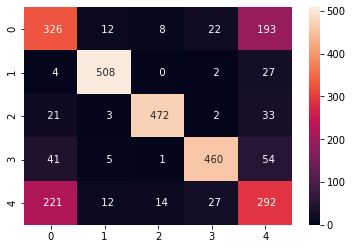

In [38]:
sns.heatmap(confusion_matrix(y_test_os, y_pred7),
           annot = True,
           fmt = '4g');

In [39]:
joblib.dump(rfc_grid, 'Ratings-predictor.pkl')

['Ratings-predictor.pkl']